In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
import pandas as pd

from regression import run_gee_logistic, run_gee_poisson, gen_result_summary, run_delay_sensitivity_analysis
from utils import plot_booster_effectiveness_wrt_delay

In [4]:
OMICRON_START_DATE = '2021-12-05'
OMICRON_END_DATE = '2021-12-31'

## Full Poisson regression w/ GEE

In [5]:
df = pd.read_csv(f"../data/regression/data_indiv_day_delay_7.csv")

C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.shape

(155056, 26)

In [7]:
features = ['booster', 'student_group', 'vac_type_agg', 'last_dose_month', 'current_gender', 'week']

In [8]:
param, conf_int, corr, res = run_gee_poisson(features, df)

infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
                               GEE Regression Results                              
Dep. Variable:                   infection   No. Observations:                29786
Model:                                 GEE   No. clusters:                    15515
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   5
Family:                            Poisson   Mean cluster size:                 1.9
Dependence structure:         Exchangeable   Num. iterations:                     8
Date:                     Fri, 23 Sep 2022   Scale:                           1.000
Covariance type:                    robust   Time:                         17:44:42
                                                         

In [9]:
corr

-0.011674772490554961

In [10]:
summary = gen_result_summary(res)
summary.to_csv(f"../results/poisson_gee_full_results.csv")
summary

,coeff,SE,p-value,adj p-value,aOR,aOR lower,aOR upper
Intercept,-5.444535,0.062915,0.000000e+00,0.000000e+00,4.319849e-03,3.559292e-03,5.242925e-03
C(booster)[T.1],-0.830568,0.094032,1.020897e-18,2.450153e-17,4.358015e-01,3.262771e-01,5.820909e-01
"C(student_group, Treatment('UG-other'))[T.GM]",0.492884,0.113381,1.379264e-05,3.310235e-04,1.637031e+00,1.154753e+00,2.320730e+00
"C(student_group, Treatment('UG-other'))[T.LA]",-0.845254,0.172506,9.591029e-07,2.301847e-05,4.294484e-01,2.525256e-01,7.303256e-01
"C(student_group, Treatment('UG-other'))[T.UG-athlete]",0.702528,0.082450,1.586038e-17,3.806492e-16,2.018850e+00,1.566339e+00,2.602092e+00
"C(student_group, Treatment('UG-other'))[T.UG-greek]",0.770526,0.052424,6.631264e-49,1.591503e-47,2.160903e+00,1.838890e+00,2.539306e+00
"C(student_group, Treatment('UG-other'))[T.VM]",-1.790428,0.254877,2.145477e-12,5.149144e-11,1.668888e-01,7.615688e-02,3.657171e-01
"C(vac_type_agg, Treatment('Pfizer'))[T.J&J]",0.100710,0.096881,2.985590e-01,1.000000e+00,1.105956e+00,8.207829e-01,1.490210e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Moderna]",-0.026030,0.055082,6.365162e-01,1.000000e+00,9.743054e-01,8.223591e-01,1.154327e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Others]",-0.626547,0.156666,6.354367e-05,1.525048e-03,5.344340e-01,3.299615e-01,8.656152e-01


## GEE Poisson regression (univariate model) for unadjusted IRR

In [11]:
features = ['booster', 'student_group', 'vac_type_agg', 'last_dose_month', 'current_gender', 'week']
df = pd.read_csv(f"../data/regression/data_indiv_day_delay_7.csv")

for feature in features:
    param, conf_int, corr, res = run_gee_poisson([feature], df, verbose=False)
    print(np.exp(res.params))

C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


infection ~ 1 + C(booster)
Intercept          0.013447
C(booster)[T.1]    0.465673
dtype: float64
infection ~ 1 + C(student_group, Treatment('UG-other'))
Intercept                                                0.010518
C(student_group, Treatment('UG-other'))[T.GM]            1.511960
C(student_group, Treatment('UG-other'))[T.LA]            0.406979
C(student_group, Treatment('UG-other'))[T.UG-athlete]    1.995604
C(student_group, Treatment('UG-other'))[T.UG-greek]      2.202882
C(student_group, Treatment('UG-other'))[T.VM]            0.205779
dtype: float64
infection ~ 1 + C(vac_type_agg, Treatment('Pfizer'))
Intercept                                          0.013201
C(vac_type_agg, Treatment('Pfizer'))[T.J&J]        1.160076
C(vac_type_agg, Treatment('Pfizer'))[T.Moderna]    0.928800
C(vac_type_agg, Treatment('Pfizer'))[T.Others]     0.370907
dtype: float64
infection ~ 1 + C(last_dose_month, Treatment(5))
Intercept                                 1.169372e-02
C(last_dose_month, Trea

## Full logistic regression w/ GEE

In [12]:
param, conf_int, corr, res = run_gee_logistic(features, df)

infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
                               GEE Regression Results                              
Dep. Variable:                   infection   No. Observations:               155056
Model:                                 GEE   No. clusters:                    15515
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                  27
Family:                           Binomial   Mean cluster size:                10.0
Dependence structure:         Exchangeable   Num. iterations:                     8
Date:                     Tue, 20 Sep 2022   Scale:                           1.000
Covariance type:                    robust   Time:                         13:36:39
                                                         

In [13]:
corr

-0.0015945770950228134

In [14]:
summary = gen_result_summary(res)
summary.to_csv(f"../results/logistic_gee_full_results.csv")
summary

,coeff,SE,p-value,adj p-value,aOR,aOR lower,aOR upper
Intercept,-5.456889,0.064353,0.000000e+00,0.000000e+00,4.266811e-03,3.500065e-03,5.201524e-03
C(booster)[T.1],-0.848182,0.095510,6.650374e-19,1.596090e-17,4.281925e-01,3.191259e-01,5.745344e-01
"C(student_group, Treatment('UG-other'))[T.GM]",0.504918,0.116689,1.511193e-05,3.626864e-04,1.656849e+00,1.156895e+00,2.372858e+00
"C(student_group, Treatment('UG-other'))[T.LA]",-0.860081,0.174011,7.705183e-07,1.849244e-05,4.231276e-01,2.476591e-01,7.229170e-01
"C(student_group, Treatment('UG-other'))[T.UG-athlete]",0.725729,0.085467,2.042785e-17,4.902683e-16,2.066237e+00,1.588284e+00,2.688018e+00
"C(student_group, Treatment('UG-other'))[T.UG-greek]",0.794856,0.054246,1.295100e-48,3.108239e-47,2.214122e+00,1.873635e+00,2.616483e+00
"C(student_group, Treatment('UG-other'))[T.VM]",-1.813623,0.255857,1.356561e-12,3.255746e-11,1.630624e-01,7.418645e-02,3.584123e-01
"C(vac_type_agg, Treatment('Pfizer'))[T.J&J]",0.103182,0.100115,3.027129e-01,1.000000e+00,1.108693e+00,8.146627e-01,1.508846e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Moderna]",-0.027868,0.056524,6.219908e-01,1.000000e+00,9.725167e-01,8.172145e-01,1.157332e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Others]",-0.637261,0.158438,5.767085e-05,1.384100e-03,5.287386e-01,3.246694e-01,8.610743e-01


## Poisson regression w/ GEE (reduced study period)

In [15]:
df = df[df['day'] <= 13]
param, conf_int, corr, res = run_gee_poisson(features, df)

infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
                               GEE Regression Results                              
Dep. Variable:                   infection   No. Observations:                27857
Model:                                 GEE   No. clusters:                    15515
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   3
Family:                            Poisson   Mean cluster size:                 1.8
Dependence structure:         Exchangeable   Num. iterations:                     7
Date:                     Tue, 20 Sep 2022   Scale:                           1.000
Covariance type:                    robust   Time:                         13:36:49
                                                         

In [16]:
corr

-0.012903051165546927

In [17]:
summary = gen_result_summary(res)
summary.to_csv(f"../results/poisson_gee_reduced_period_results.csv")
summary

,coeff,SE,p-value,adj p-value,aOR,aOR lower,aOR upper
Intercept,-5.429601,0.063154,0.000000e+00,0.000000e+00,4.384844e-03,3.616131e-03,5.316969e-03
C(booster)[T.1],-0.845100,0.098496,9.484960e-18,2.086691e-16,4.295142e-01,3.179957e-01,5.801413e-01
"C(student_group, Treatment('UG-other'))[T.GM]",0.584519,0.114727,3.489724e-07,7.677393e-06,1.794128e+00,1.264106e+00,2.546381e+00
"C(student_group, Treatment('UG-other'))[T.LA]",-1.148688,0.219571,1.681200e-07,3.698641e-06,3.170524e-01,1.622151e-01,6.196846e-01
"C(student_group, Treatment('UG-other'))[T.UG-athlete]",0.742113,0.081740,1.096437e-19,2.412162e-18,2.100369e+00,1.636626e+00,2.695515e+00
"C(student_group, Treatment('UG-other'))[T.UG-greek]",0.758861,0.053104,2.524058e-46,5.552927e-45,2.135842e+00,1.816268e+00,2.511646e+00
"C(student_group, Treatment('UG-other'))[T.VM]",-2.304796,0.381099,1.468666e-09,3.231066e-08,9.977913e-02,3.118138e-02,3.192891e-01
"C(vac_type_agg, Treatment('Pfizer'))[T.J&J]",0.078994,0.098843,4.241817e-01,1.000000e+00,1.082198e+00,8.003699e-01,1.463264e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Moderna]",-0.038824,0.056130,4.891453e-01,1.000000e+00,9.619203e-01,8.104730e-01,1.141668e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Others]",-0.633965,0.173822,2.650988e-04,5.832173e-03,5.304845e-01,3.120851e-01,9.017213e-01


## Multi-class booster status

In [18]:
df_7 = pd.read_csv(f"../data/regression/data_indiv_day_delay_7.csv")
df_0 =  pd.read_csv(f"../data/regression/data_indiv_day_delay_0.csv")
df_agg = df_7.merge(df_0[['employee_id_hash', 'day', 'booster']], left_on=['employee_id_hash', 'day'], right_on=['employee_id_hash', 'day'])
print(df_7.shape, df_0.shape, df_agg.shape)

def label_booster(row):
    if row['booster_x'] == 1:
        return 2
    elif row['booster_x'] == 0 and row['booster_y'] == 1:
        return 1
    else:
        return 0
    
df_agg['booster'] = df_agg.apply(lambda row: label_booster(row), axis=1)
param, conf_int, corr, res = run_gee_poisson(features, df_agg)

C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(155056, 26) (155056, 26) (155056, 27)
infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
                               GEE Regression Results                              
Dep. Variable:                   infection   No. Observations:                30516
Model:                                 GEE   No. clusters:                    15515
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   6
Family:                            Poisson   Mean cluster size:                 2.0
Dependence structure:         Exchangeable   Num. iterations:                     8
Date:                     Tue, 20 Sep 2022   Scale:                           1.000
Covariance type:                    robust   Time:                         13:37:05
                  

In [19]:
corr

-0.01044473595079645

In [20]:
summary = gen_result_summary(res)
summary.to_csv(f"../results/poisson_gee_multi_booster_class_results.csv")
summary

,coeff,SE,p-value,adj p-value,aOR,aOR lower,aOR upper
Intercept,-5.442260,0.062870,0.000000e+00,0.000000e+00,4.329686e-03,3.565171e-03,5.258144e-03
C(booster)[T.1],-0.171517,0.129283,1.846136e-01,1.000000e+00,8.423859e-01,5.649430e-01,1.256081e+00
C(booster)[T.2],-0.840442,0.094333,5.136186e-19,1.284046e-17,4.315197e-01,3.224028e-01,5.775673e-01
"C(student_group, Treatment('UG-other'))[T.GM]",0.500020,0.113545,1.064056e-05,2.660139e-04,1.648753e+00,1.160836e+00,2.341750e+00
"C(student_group, Treatment('UG-other'))[T.LA]",-0.845357,0.172515,9.574932e-07,2.393733e-05,4.294041e-01,2.519638e-01,7.318031e-01
"C(student_group, Treatment('UG-other'))[T.UG-athlete]",0.705639,0.082392,1.086372e-17,2.715929e-16,2.025140e+00,1.569926e+00,2.612348e+00
"C(student_group, Treatment('UG-other'))[T.UG-greek]",0.768846,0.052435,1.114965e-48,2.787411e-47,2.157275e+00,1.834569e+00,2.536746e+00
"C(student_group, Treatment('UG-other'))[T.VM]",-1.788253,0.254846,2.266836e-12,5.667091e-11,1.672521e-01,7.609399e-02,3.676146e-01
"C(vac_type_agg, Treatment('Pfizer'))[T.J&J]",0.102764,0.096901,2.889177e-01,1.000000e+00,1.108230e+00,8.214502e-01,1.495128e+00
"C(vac_type_agg, Treatment('Pfizer'))[T.Moderna]",-0.025115,0.055092,6.484777e-01,1.000000e+00,9.751974e-01,8.225357e-01,1.156193e+00


## Sensitivity Analysis

In [21]:
ans = np.zeros((14, 5), dtype=int)
delays =  list(range(1, 15))
ans[:, 0] = delays
for i, d in enumerate(delays):
    df = pd.read_csv(f"../data/regression/data_indiv_day_delay_{d}.csv")
    ans[i, 1] = df[df['booster'] == 0]['employee_id_hash'].count()
    ans[i, 2] = df[(df['booster'] == 0) & (df['infection'] == 1)]['employee_id_hash'].count()
    ans[i, 3] = df[df['booster'] == 1]['employee_id_hash'].count()
    ans[i, 4] = df[(df['booster'] == 1) & (df['infection'] == 1)]['employee_id_hash'].count()
    
print(ans)
np.savetxt(f'../results/summary_for_diff_delays.csv', ans, fmt='%6d', delimiter=',')

C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[[     1 131474   1740  23582    186]
 [     2 132184   1750  22872    176]
 [     3 132872   1762  22184    164]
 [     4 133520   1773  21536    153]
 [     5 134127   1779  20929    147]
 [     6 134700   1787  20356    139]
 [     7 135214   1799  19842    127]
 [     8 135679   1802  19377    124]
 [     9 136206   1808  18850    118]
 [    10 136872   1813  18184    113]
 [    11 137485   1816  17571    110]
 [    12 138311   1818  16745    108]
 [    13 139185   1821  15871    105]
 [    14 140072   1827  14984     99]]


In [22]:
booster_effectiveness = run_delay_sensitivity_analysis(run_gee_poisson, features)
booster_effectiveness

delay = 1



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 2



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 3



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 4



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 5



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 6



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 7



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 8



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 9



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 10



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 11



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 12



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 13



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))
delay = 14



C:\Users\jw2529\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


infection ~ 1 + C(booster) + C(student_group, Treatment('UG-other')) + C(vac_type_agg, Treatment('Pfizer')) + C(last_dose_month, Treatment(5)) + C(current_gender) + C(week, Treatment(0))


array([[0.47987984, 0.59379614, 0.33401671],
       [0.48989363, 0.60395378, 0.3429845 ],
       [0.50860347, 0.62126917, 0.36242171],
       [0.52672646, 0.63789399, 0.3814302 ],
       [0.52801864, 0.64052897, 0.38029386],
       [0.53717046, 0.6497153 , 0.38846549],
       [0.5641985 , 0.67372287, 0.4179091 ],
       [0.56052127, 0.6719941 , 0.41116438],
       [0.57083799, 0.68150129, 0.42172439],
       [0.57583479, 0.68700479, 0.42517931],
       [0.57379019, 0.68666265, 0.42025805],
       [0.56509288, 0.68137503, 0.40637356],
       [0.56087343, 0.67979708, 0.39778142],
       [0.57031464, 0.68939877, 0.40557381]])

Plot of booster effectiveness saved to ../figures/


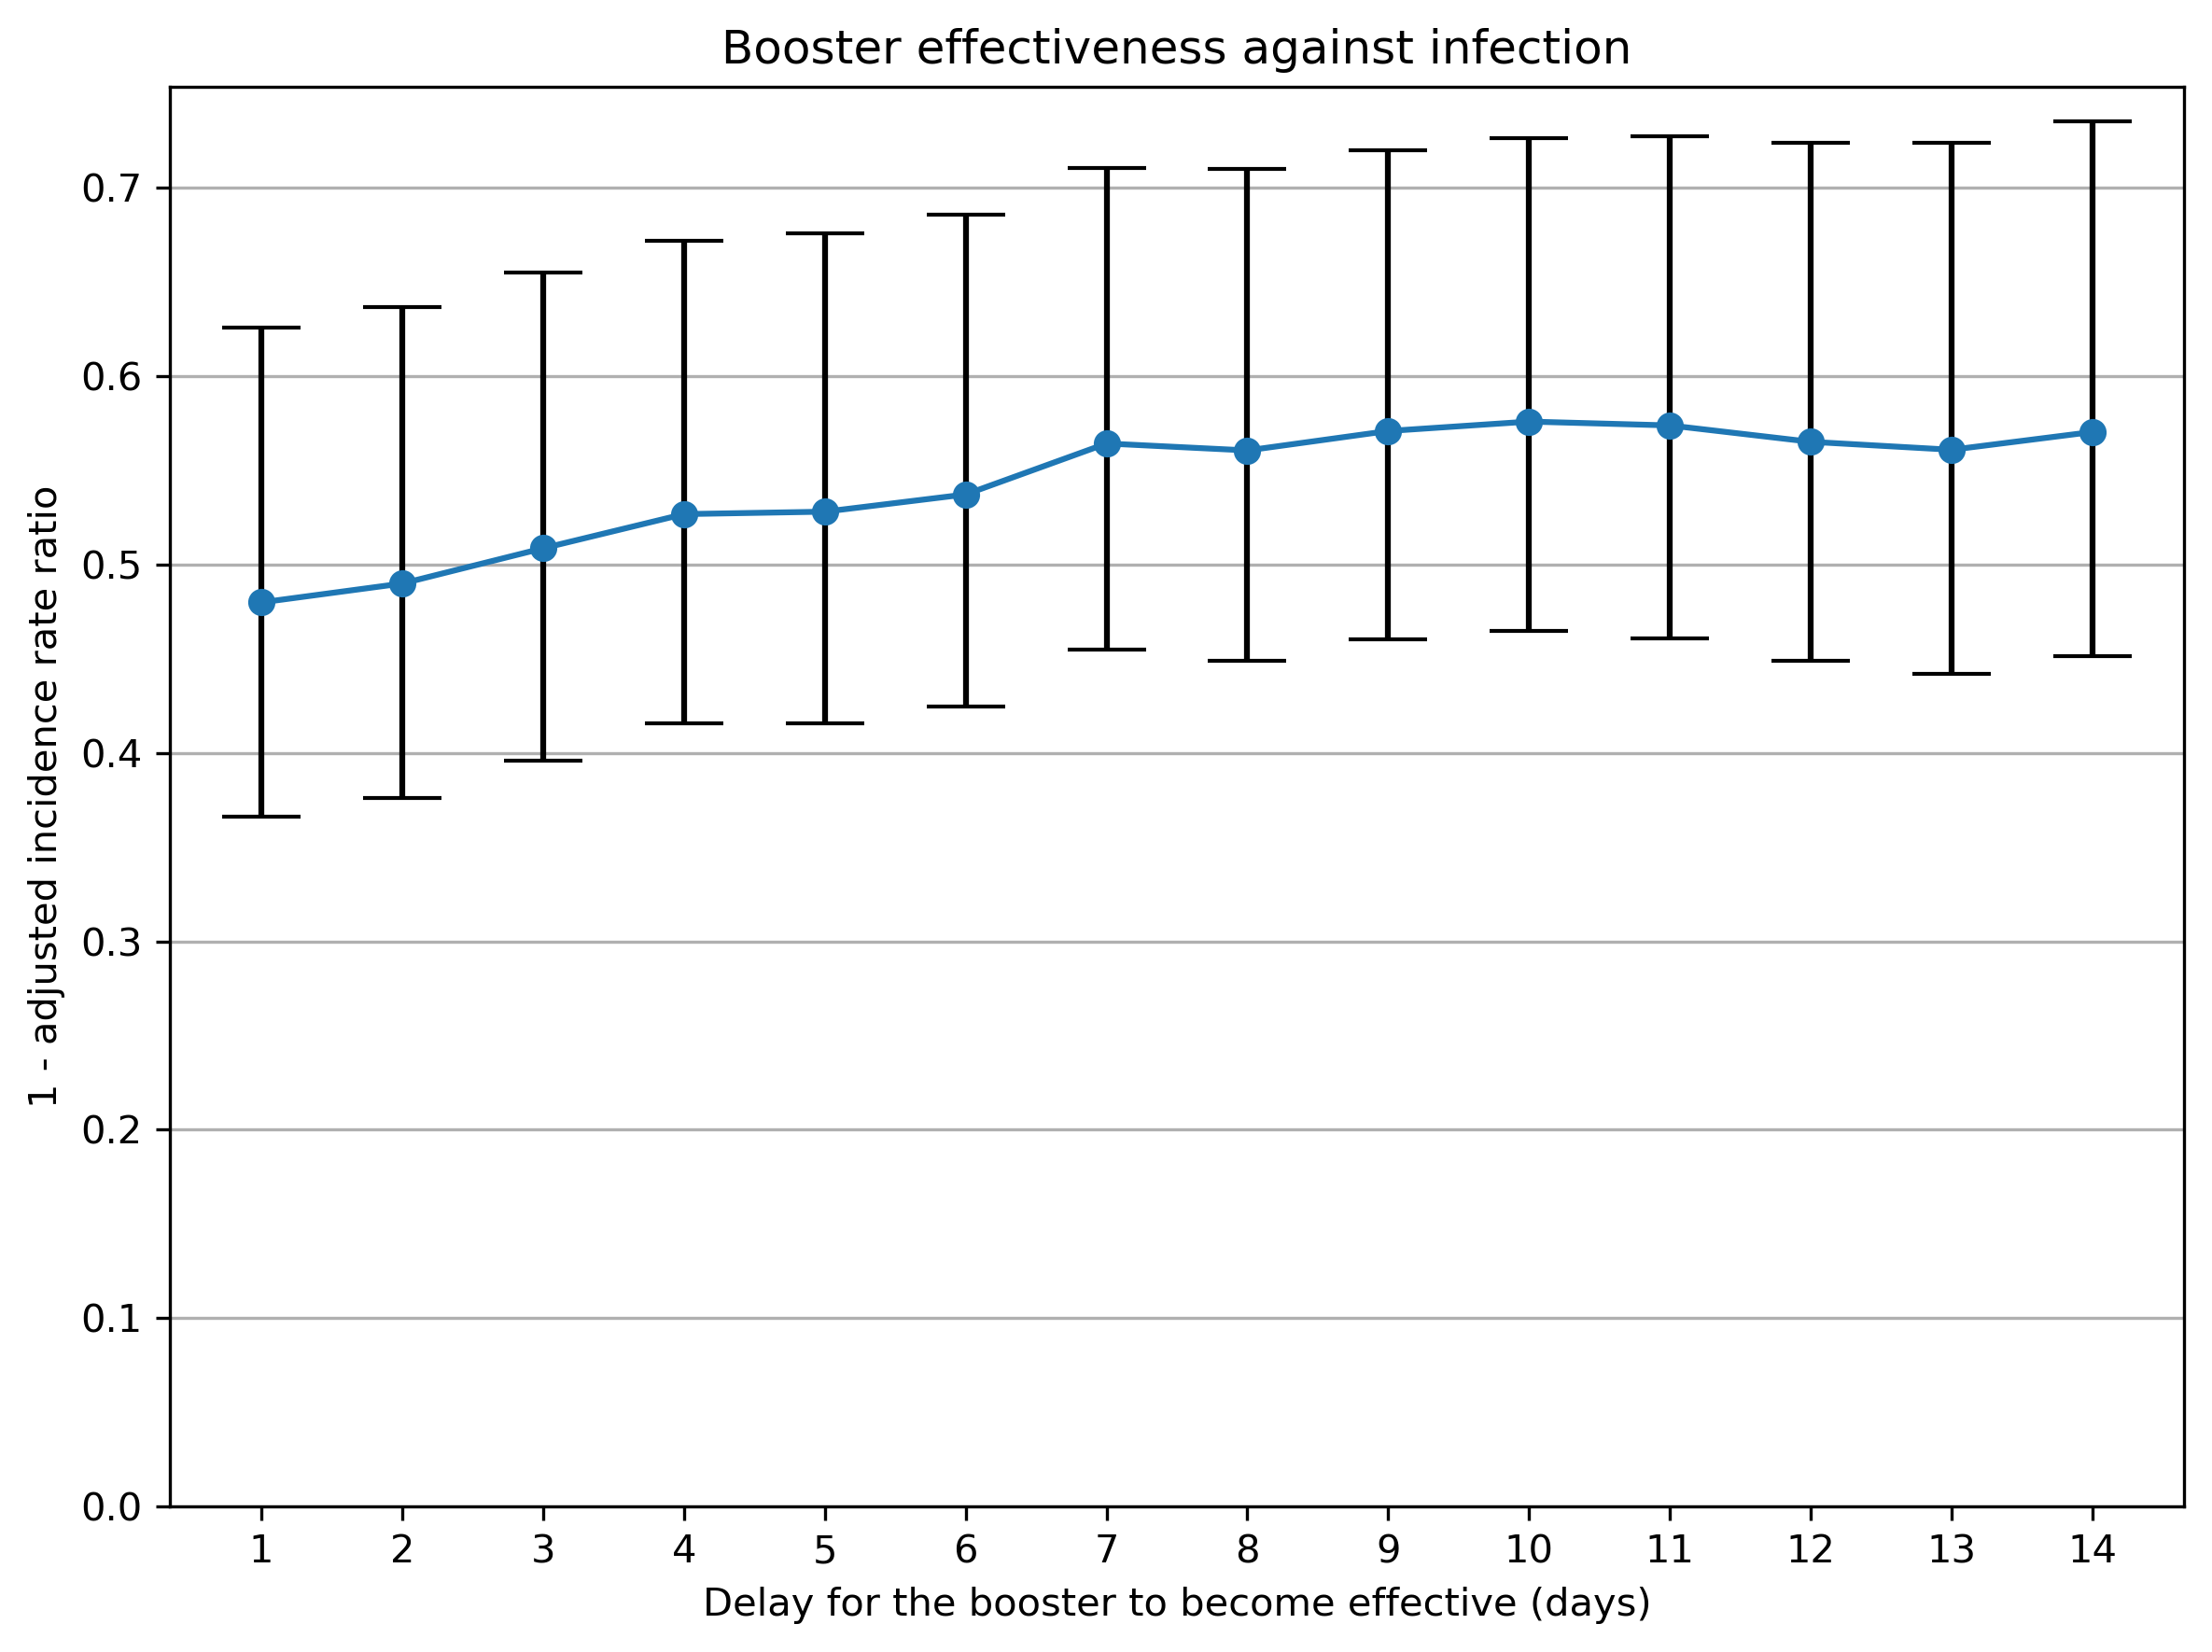

In [24]:
plot_booster_effectiveness_wrt_delay(booster_effectiveness)